###### 1. Darwin's bibliography


# A content-based book recommendation system

In [13]:
import sys
sys.path.append('/Users/shreyas/.pyenv/versions/3.7.2/lib/python3.7/site-packages/')

In [1]:
# Import library
import glob
import os

# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(os.path.join(folder,'*.txt'))

files = sorted(files)

In [2]:
files[:10]

['datasets/Autobiography.txt',
 'datasets/CoralReefs.txt',
 'datasets/DescentofMan.txt',
 'datasets/DifferentFormsofFlowers.txt',
 'datasets/EffectsCrossSelfFertilization.txt',
 'datasets/ExpressionofEmotionManAnimals.txt',
 'datasets/FormationVegetableMould.txt',
 'datasets/FoundationsOriginofSpecies.txt',
 'datasets/GeologicalObservationsSouthAmerica.txt',
 'datasets/InsectivorousPlants.txt']

## 2. Load the contents of each book into Python
<p>load the content of these books into Python and do some basic pre-processing.

In [3]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    pattern = re.compile('[\W\D]+')
    char = pattern.sub('',f.read())
    # Store the texts and titles of the books in two separate lists
    text = os.path.basename(n)
    txts.append(text)
    titles.append(text.replace(".txt", ""))

# Print the length, in characters, of each book
[len(t) for t in txts]

[17,
 14,
 16,
 27,
 33,
 33,
 27,
 30,
 38,
 23,
 22,
 22,
 23,
 27,
 26,
 19,
 23,
 39,
 19,
 16]

In [4]:
titles

['Autobiography',
 'CoralReefs',
 'DescentofMan',
 'DifferentFormsofFlowers',
 'EffectsCrossSelfFertilization',
 'ExpressionofEmotionManAnimals',
 'FormationVegetableMould',
 'FoundationsOriginofSpecies',
 'GeologicalObservationsSouthAmerica',
 'InsectivorousPlants',
 'LifeandLettersVol1',
 'LifeandLettersVol2',
 'MonographCirripedia',
 'MonographCirripediaVol2',
 'MovementClimbingPlants',
 'OriginofSpecies',
 'PowerMovementPlants',
 'VariationPlantsAnimalsDomestication',
 'VolcanicIslands',
 'VoyageBeagle']

In [5]:
txts

['Autobiography.txt',
 'CoralReefs.txt',
 'DescentofMan.txt',
 'DifferentFormsofFlowers.txt',
 'EffectsCrossSelfFertilization.txt',
 'ExpressionofEmotionManAnimals.txt',
 'FormationVegetableMould.txt',
 'FoundationsOriginofSpecies.txt',
 'GeologicalObservationsSouthAmerica.txt',
 'InsectivorousPlants.txt',
 'LifeandLettersVol1.txt',
 'LifeandLettersVol2.txt',
 'MonographCirripedia.txt',
 'MonographCirripediaVol2.txt',
 'MovementClimbingPlants.txt',
 'OriginofSpecies.txt',
 'PowerMovementPlants.txt',
 'VariationPlantsAnimalsDomestication.txt',
 'VolcanicIslands.txt',
 'VoyageBeagle.txt']

## 3. Find "On the Origin of Species"
 For consistency, we will refer to Darwin's most famous book: "<em>On the Origin of Species</em>."</p>

In [6]:
# Browse the list containing all the titles
ori = None
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if titles[i] == "OriginofSpecies":
        ori = i

# Print the stored index
print(ori)

15


## 4. Tokenize the corpus


In [7]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [open(i, 'rt').read().lower() for i in files]

# Transform the text into tokens 
txts_split = [i.split() for i in txts_lower_case]
# txts_split[15]
# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "On the Origin of Species" book
print(texts[15][:20])

['on', 'origin', 'species.', '*', '*', '*', '*', '*', '"but', 'with', 'regard', 'material', 'world,', 'can', 'least', 'go', 'so', 'far', 'this--we', 'can']


## 5. Stemming of the tokenized corpus


In [9]:
# Load the Porter stemming function from the nltk package
from nltk.stem import PorterStemmer

# Create an instance of a PorterStemmer object
porter = PorterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

# # Save to pickle file
# pickle.dump( texts_stem, open( "datasets/texts_stem.p", "wb" ) )

In [10]:
# import pickle

# # Load the stemmed tokens list from the pregenerated pickle file
# stem_tokens = open('datasets/texts_stem.p','rb')
# texts_stem = pickle.load(stem_tokens)

# Print the 20 first stemmed tokens from the "On the Origin of Species" book
print(texts_stem[15][:20])

['on', 'origin', 'species.', '*', '*', '*', '*', '*', '"but', 'with', 'regard', 'materi', 'world,', 'can', 'least', 'go', 'so', 'far', 'this--w', 'can']


## 6. Building a bag-of-words model


In [14]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)
print(dictionary[15])
# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]

# Print the first five elements of the On the Origin of species' BoW model
bows[15][:5]

"it


[(0, 3), (8, 1), (14, 1), (15, 1), (25, 1)]

## 7. The most common words of a given book


In [15]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[15])

# Add the column names to the DataFrame
df_bow_origin.columns = ['index','occurrences']

# Add a column containing the token corresponding to the dictionary index
df_bow_origin['token'] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values('occurrences', ascending = False)[:10]

,index,occurrences,token
851,1831,2000,have
1318,2709,1486,on
1025,2123,1423,it
269,707,1350,by
1336,2734,1173,or
757,1655,1131,from
152,461,1114,are
2088,4151,991,with
201,568,932,been
1881,3782,916,thi


## Building a tf-idf model


In [17]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
print(model[bows[15]][:5])

[(0, 0.0003275493687410397), (8, 0.0006195272520099707), (14, 0.0006195272520099707), (15, 0.0004464122426050609), (25, 0.0001091831229136799)]


## The results of the tf-idf model


In [18]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[15]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id','score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[index] for index in df_tfidf["id"]]


# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values('score', ascending = False)[:10]

,id,score,token
8768,91777,0.831985,"----,"
6545,40441,0.142222,----
5962,32114,0.103435,*
1141,3355,0.085381,select
356,1223,0.073212,domest
169,674,0.072522,breed
1233,3606,0.066909,steril
559,1729,0.060923,glacial
1142,3356,0.060876,"selection,"
4794,24145,0.056023,migrat


## 10. Compute distance between texts
<p>The results of the tf-idf algorithm now return stemmed tokens which are specific to each book. We can, for example, see that topics such as selection, breeding or domestication are defining "<em>On the Origin of Species</em>" (and yes, in this book, Charles Darwin talks quite a lot about pigeons too). Now that we have a model associating tokens to how specific they are to each book, we can measure how related to books are between each other.</p>
<p>To this purpose, we will use a measure of similarity called <strong>cosine similarity</strong> and we will visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between Darwin's books.</p>

In [21]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df.head()

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.022216,0.061752,0.020368,0.015065,0.046792,0.025445,0.019412,0.022570,0.007820,0.331796,0.184490,0.005543,0.007208,0.015698,0.038278,0.006990,0.016540,0.030561,0.123630
CoralReefs,0.022216,1.000000,0.009091,0.001608,0.001094,0.004537,0.021265,0.008094,0.059506,0.002466,0.028519,0.016729,0.006480,0.009070,0.002536,0.016879,0.002246,0.004633,0.057725,0.163912
DescentofMan,0.061752,0.009091,1.000000,0.028243,0.009309,0.091240,0.027157,0.047206,0.012841,0.009540,0.051233,0.060678,0.042236,0.030280,0.007884,0.098939,0.009202,0.075369,0.011085,0.097757
DifferentFormsofFlowers,0.020368,0.001608,0.028243,1.000000,0.435059,0.002642,0.005926,0.007437,0.015193,0.028427,0.007328,0.019620,0.004611,0.003155,0.006395,0.030445,0.008783,0.019064,0.003138,0.007722
EffectsCrossSelfFertilization,0.015065,0.001094,0.009309,0.435059,1.000000,0.001983,0.014741,0.005388,0.023251,0.048217,0.005831,0.011901,0.001670,0.001639,0.007748,0.023218,0.014657,0.023606,0.001848,0.007032


##The book most similar to "On the Origin of Species"


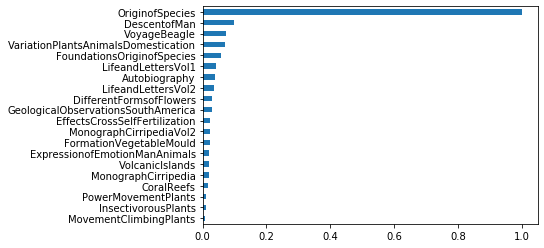

In [22]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['OriginofSpecies']

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot
v_sorted.plot.barh()

##Which books have similar content?


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [135.0, 135.0, 167.5, 167.5],
  [112.5, 112.5, 151.25, 151.25],
  [71.25, 71.25, 131.875, 131.875],
  [23.75, 23.75, 101.5625, 101.5625],
  [5.0, 5.0, 62.65625, 62.65625]],
 'dcoord': [[0.0, 0.004622414708137512, 0.004622414708137512, 0.0],
  [0.0, 0.015034520888669325, 0.015034520888669325, 0.004622414708137512],
  [0.0, 0.03939934922318701, 0.03939934922318701, 0.015034520888669325],
  [0.0, 0.0016276761889457703, 0.0016276761889457703, 0.0],
  [0.0, 0.0028087012469768524, 0.0028087012469768524, 0.0],
  [0.0, 0.005559133665712132, 0.005559133665712132, 0.00280

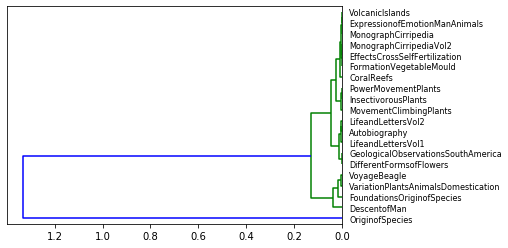

In [33]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
df = pd.DataFrame(v)
Z = hierarchy.linkage(df, 'ward')


# Display this result as a horizontal dendrogram
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")
